In [ ]:
import numpy as np
import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM, RNN
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, GRU

C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [ ]:
# !pip install numpy==1.19.5


# Data Prep

In [ ]:
data = pd.read_pickle('PeMS_dataset.pkl')

<IPython.core.display.Javascript object>

In [ ]:
data['Timestamp'] = data['Date'].dt.strftime('%Y-%m-%d').astype('str') +' '+ data['TOD'].astype('str')
data['Timestamp'] = data['Timestamp'].astype(np.datetime64)

In [ ]:
data = data.drop(['Date','TOD'],1).sort_values('Timestamp').reset_index(drop=True)
data.head()

,Travel Time,# Lane Pts,start,end,distance,Timestamp
0,3.38,37,SR 78,Centre City Pkwy,6.28,2020-01-10
1,42.95,441,Orange Co Line/I-605,I-5,77.90,2020-01-10
2,20.00,232,405-N/Wardlow Rd,405-N/National Blvd,35.89,2020-01-10
3,16.48,143,405-N/Sepulveda Blvd,405-N/Onion Ave,30.58,2020-01-10
4,21.83,250,405-N/Wardlow Rd,405-N/State Hwy 2,39.12,2020-01-10


In [ ]:
data

,Travel Time,# Lane Pts,start,end,distance,Timestamp
0,3.38,37,SR 78,Centre City Pkwy,6.28,2020-01-10 00:00:00
1,42.95,441,Orange Co Line/I-605,I-5,77.90,2020-01-10 00:00:00
2,20.00,232,405-N/Wardlow Rd,405-N/National Blvd,35.89,2020-01-10 00:00:00
3,16.48,143,405-N/Sepulveda Blvd,405-N/Onion Ave,30.58,2020-01-10 00:00:00
4,21.83,250,405-N/Wardlow Rd,405-N/State Hwy 2,39.12,2020-01-10 00:00:00
...,...,...,...,...,...,...
211387,16.48,144,405-N/Sepulveda Blvd,405-N/Onion Ave,30.58,2020-06-30 23:55:00
211388,19.82,233,405-N/Wardlow Rd,405-N/National Blvd,35.89,2020-06-30 23:55:00
211389,3.37,37,SR 78,Centre City Pkwy,6.28,2020-06-30 23:55:00
211390,42.82,443,Orange Co Line/I-605,I-5,77.90,2020-06-30 23:55:00


In [ ]:
data.dtypes

Travel Time           float64
# Lane Pts              int64
start                  object
end                    object
distance              float64
Timestamp      datetime64[ns]
dtype: object

In [ ]:
# Encoding fuel_type using get_dummies
encoded_data = pd.get_dummies(data, columns=['start','end'], drop_first=True)

<IPython.core.display.Javascript object>

In [ ]:
encoded_data

,Travel Time,# Lane Pts,distance,Timestamp,start_405-N/Sepulveda Blvd,start_405-N/Wardlow Rd,start_5-N/Vandegrift Blvd,start_Orange Co Line/I-605,start_SR 78,end_118-W/Tapo Canyon Rd,end_405-N/National Blvd,end_405-N/Onion Ave,end_405-N/State Hwy 2,end_Centre City Pkwy,end_I-5
0,3.38,37,6.28,2020-01-10 00:00:00,0,0,0,0,1,0,0,0,0,1,0
1,42.95,441,77.90,2020-01-10 00:00:00,0,0,0,1,0,0,0,0,0,0,1
2,20.00,232,35.89,2020-01-10 00:00:00,0,1,0,0,0,0,1,0,0,0,0
3,16.48,143,30.58,2020-01-10 00:00:00,1,0,0,0,0,0,0,1,0,0,0
4,21.83,250,39.12,2020-01-10 00:00:00,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211387,16.48,144,30.58,2020-06-30 23:55:00,1,0,0,0,0,0,0,1,0,0,0
211388,19.82,233,35.89,2020-06-30 23:55:00,0,1,0,0,0,0,1,0,0,0,0
211389,3.37,37,6.28,2020-06-30 23:55:00,0,0,0,0,1,0,0,0,0,1,0
211390,42.82,443,77.90,2020-06-30 23:55:00,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
from datetime import timezone
import pandas as pd
from datetime import datetime
import time
# import utils as get_data

def preprocess(dataframe):
    
    dataframe['dept_hour'] = dataframe['Timestamp'].dt.hour
    dataframe['dept_minute'] = dataframe['Timestamp'].dt.minute
    dataframe['dept_dayofweek'] = dataframe['Timestamp'].dt.dayofweek
    dataframe['dept_monthofyear'] = dataframe['Timestamp'].dt.month   
#     dataframe = dataframe.drop([''], axis=1)
        
    return dataframe

In [ ]:
preprocess(encoded_data)

,Travel Time,# Lane Pts,distance,Timestamp,start_405-N/Sepulveda Blvd,start_405-N/Wardlow Rd,start_5-N/Vandegrift Blvd,start_Orange Co Line/I-605,start_SR 78,end_118-W/Tapo Canyon Rd,end_405-N/National Blvd,end_405-N/Onion Ave,end_405-N/State Hwy 2,end_Centre City Pkwy,end_I-5,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear
0,3.38,37,6.28,2020-01-10 00:00:00,0,0,0,0,1,0,0,0,0,1,0,0,0,4,1
1,42.95,441,77.90,2020-01-10 00:00:00,0,0,0,1,0,0,0,0,0,0,1,0,0,4,1
2,20.00,232,35.89,2020-01-10 00:00:00,0,1,0,0,0,0,1,0,0,0,0,0,0,4,1
3,16.48,143,30.58,2020-01-10 00:00:00,1,0,0,0,0,0,0,1,0,0,0,0,0,4,1
4,21.83,250,39.12,2020-01-10 00:00:00,0,1,0,0,0,0,0,0,1,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211387,16.48,144,30.58,2020-06-30 23:55:00,1,0,0,0,0,0,0,1,0,0,0,23,55,1,6
211388,19.82,233,35.89,2020-06-30 23:55:00,0,1,0,0,0,0,1,0,0,0,0,23,55,1,6
211389,3.37,37,6.28,2020-06-30 23:55:00,0,0,0,0,1,0,0,0,0,1,0,23,55,1,6
211390,42.82,443,77.90,2020-06-30 23:55:00,0,0,0,1,0,0,0,0,0,0,1,23,55,1,6


In [ ]:
# Using SciKit Learn
# Encoding make column using LabelEncoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

encoded_data['LanePts'] = labelencoder.fit_transform(encoded_data['# Lane Pts'])

In [ ]:
encoded_data

,Travel Time,# Lane Pts,distance,Timestamp,start_405-N/Sepulveda Blvd,start_405-N/Wardlow Rd,start_5-N/Vandegrift Blvd,start_Orange Co Line/I-605,start_SR 78,end_118-W/Tapo Canyon Rd,end_405-N/National Blvd,end_405-N/Onion Ave,end_405-N/State Hwy 2,end_Centre City Pkwy,end_I-5,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,LanePts
0,3.38,37,6.28,2020-01-10 00:00:00,0,0,0,0,1,0,0,0,0,1,0,0,0,4,1,3
1,42.95,441,77.90,2020-01-10 00:00:00,0,0,0,1,0,0,0,0,0,0,1,0,0,4,1,199
2,20.00,232,35.89,2020-01-10 00:00:00,0,1,0,0,0,0,1,0,0,0,0,0,0,4,1,77
3,16.48,143,30.58,2020-01-10 00:00:00,1,0,0,0,0,0,0,1,0,0,0,0,0,4,1,23
4,21.83,250,39.12,2020-01-10 00:00:00,0,1,0,0,0,0,0,0,1,0,0,0,0,4,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211387,16.48,144,30.58,2020-06-30 23:55:00,1,0,0,0,0,0,0,1,0,0,0,23,55,1,6,24
211388,19.82,233,35.89,2020-06-30 23:55:00,0,1,0,0,0,0,1,0,0,0,0,23,55,1,6,78
211389,3.37,37,6.28,2020-06-30 23:55:00,0,0,0,0,1,0,0,0,0,1,0,23,55,1,6,3
211390,42.82,443,77.90,2020-06-30 23:55:00,0,0,0,1,0,0,0,0,0,0,1,23,55,1,6,201


In [ ]:
processed_data = encoded_data.drop(['# Lane Pts','Timestamp'],1)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()

processed_data.iloc[:,1:] = scaler.fit_transform(processed_data.iloc[:,1:].to_numpy())

In [ ]:
processed_data

,Travel Time,distance,start_405-N/Sepulveda Blvd,start_405-N/Wardlow Rd,start_5-N/Vandegrift Blvd,start_Orange Co Line/I-605,start_SR 78,end_118-W/Tapo Canyon Rd,end_405-N/National Blvd,end_405-N/Onion Ave,end_405-N/State Hwy 2,end_Centre City Pkwy,end_I-5,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,LanePts
0,3.38,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.00,0.0,0.008982
1,42.95,0.341552,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00,0.0,0.595808
2,20.00,0.141208,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.230539
3,16.48,0.115885,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.068862
4,21.83,0.156612,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,0.284431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211387,16.48,0.115885,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.25,1.0,0.071856
211388,19.82,0.141208,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.25,1.0,0.233533
211389,3.37,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.25,1.0,0.008982
211390,42.82,0.341552,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.25,1.0,0.601796


In [ ]:
X = processed_data.iloc[:,1:]
y = processed_data.iloc[:,0]

In [ ]:
X.dtypes

distance                      float64
start_405-N/Sepulveda Blvd    float64
start_405-N/Wardlow Rd        float64
start_5-N/Vandegrift Blvd     float64
start_Orange Co Line/I-605    float64
start_SR 78                   float64
end_118-W/Tapo Canyon Rd      float64
end_405-N/National Blvd       float64
end_405-N/Onion Ave           float64
end_405-N/State Hwy 2         float64
end_Centre City Pkwy          float64
end_I-5                       float64
dept_hour                     float64
dept_minute                   float64
dept_dayofweek                float64
dept_monthofyear              float64
LanePts                       float64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
data = np.array(X_train, dtype=float)
data = data.reshape((169113,17,1))

In [ ]:
target = np.array(y_train, dtype=float)
# target = target.reshape(169113,1,1)

In [ ]:
x_test_1 = np.array(X_test, dtype=float)
x_test = x_test_1.reshape((42279,17,1))

In [ ]:
y_test = np.array(y_test, dtype=float)
# y_test = y_test.reshape((42279,1,1))

In [ ]:
x_test.shape

(42279, 17, 1)

In [ ]:
len(data[0])

17

In [ ]:
len(X_test)

42279

In [ ]:
target

array([ 3.38, 21.33, 25.22, ..., 17.13, 23.03, 20.1 ])

In [ ]:
target.shape

(169113,)

# Model Training

In [ ]:
model = Sequential()  
model.add(LSTM(64, input_shape=(17, 1),return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64))
# model.add(Dense(64))
model.add(Dense(1, activation= "linear"))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy','mse'])
# model.fit(data, target, epochs=1000, batch_size=1, verbose=2,validation_data=(x_test, y_test))

In [ ]:
# model = Sequential()  
# model.add(LSTM((64), batch_input_shape=(None,17,1),return_sequences=False))
# # model.add(Dropout(0.2))
# model.add(Dense(64))
# # model.add(Dropout(0.2))
# model.add(Dense(1, activation= "linear"))
# model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy','mse'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 17, 64)            16896     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 54,145
Trainable params: 54,145
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(data,target,epochs=50,validation_data=(x_test,y_test))

Train on 169113 samples, validate on 42279 samples
Epoch 1/50
169113/169113 [==============================] - 49s 292us/sample - loss: 5.1814 - accuracy: 0.0000e+00 - mse: 129.3935 - val_loss: 3.4549 - val_accuracy: 0.0000e+00 - val_mse: 44.7766- loss: 5 - ETA: 5s - los - ETA: 4s - loss: 5.4197 - accura - ETA: 3s - loss: 5.3698 -  - ETA: 2s - loss: 5.3098 - accuracy: 0. - ETA
Epoch 2/50
169113/169113 [==============================] - 46s 273us/sample - loss: 2.2085 - accuracy: 0.0000e+00 - mse: 18.4259 - val_loss: 1.5374 - val_accuracy: 0.0000e+00 - val_mse: 7.2820
Epoch 3/50
169113/169113 [==============================] - 47s 278us/sample - loss: 1.4013 - accuracy: 0.0000e+00 - mse: 5.5294 - val_loss: 1.1331 - val_accuracy: 0.0000e+00 - val_mse: 4.0155A: 35s - los - ETA: 29s - loss: 1.5539 - accuracy: 0.0000e+0 - ETA: 25s - loss: 1.5290 - accuracy: 0.0000e+00 - mse:  - ETA: 24s - loss: 1.5244 - accuracy: 0.0000e+00 - - ETA: 24s - loss - ETA: 18s - loss: 1.4833 - accuracy: 0.0000e+0

169113/169113 [==============================] - 47s 278us/sample - loss: 0.5570 - accuracy: 0.0000e+00 - mse: 0.8523 - val_loss: 0.5519 - val_accuracy: 0.0000e+00 - val_mse: 0.8109
Epoch 38/50
169113/169113 [==============================] - 47s 279us/sample - loss: 0.5550 - accuracy: 0.0000e+00 - mse: 0.8454 - val_loss: 0.5586 - val_accuracy: 0.0000e+00 - val_mse: 0.8687
Epoch 39/50
169113/169113 [==============================] - 48s 283us/sample - loss: 0.5527 - accuracy: 0.0000e+00 - mse: 0.8320 - val_loss: 0.5456 - val_accuracy: 0.0000e+00 - val_mse: 0.8486
Epoch 40/50
169113/169113 [==============================] - 44s 262us/sample - loss: 0.5507 - accuracy: 0.0000e+00 - mse: 0.8291 - val_loss: 0.5076 - val_accuracy: 0.0000e+00 - val_mse: 0.7308
Epoch 41/50
169113/169113 [==============================] - 48s 283us/sample - loss: 0.5467 - accuracy: 0.0000e+00 - mse: 0.8184 - val_loss: 0.5770 - val_accuracy: 0.0000e+00 - val_mse: 0.8956
Epoch 42/50
169113/169113 [===============

# Save Model

In [ ]:
# model.save('LSTM_2_layer')

# !mkdir -p saved_model
model.save('LSTM_2_layer.h5')

# tf.keras.models.save_model

# Load Saved Model

In [ ]:
new_model = tf.keras.models.load_model('LSTM_2_layer.h5')

In [ ]:
# saved_model = tf.keras.models.load_model('LSTM_2_layer.h5')

# Prediction

In [ ]:
prediction = new_model.predict(x_test)

In [ ]:
prediction = [i[0] for i in prediction]

In [ ]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = y_test
pre_ac['Prediction'] = prediction
pre_ac['travels'] = [l for l in range(0,len(prediction))]

In [ ]:
# pre_ac

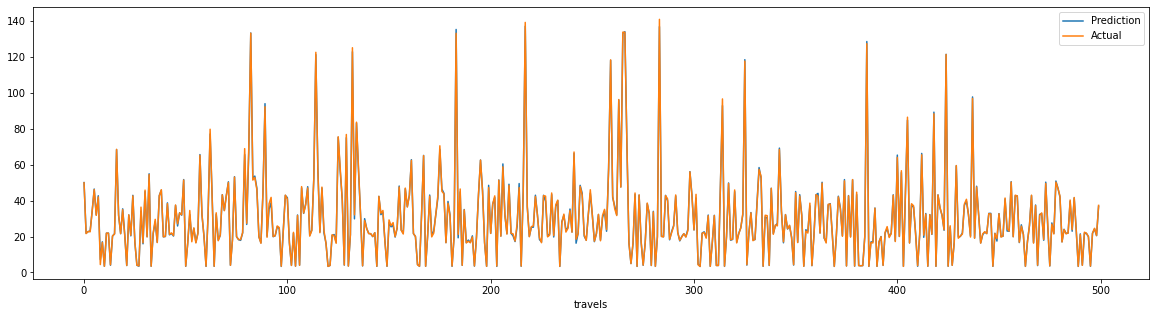

In [ ]:
import matplotlib.pyplot as plt


pre_ac[0:500].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In [ ]:
# pre_ac.plot()

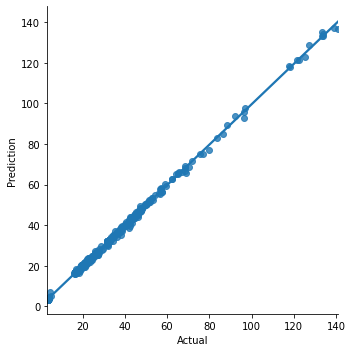

In [ ]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac[0:500]);

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
mae = mean_absolute_error(y_test, prediction)
errors = abs(prediction - y_test)
mape = 100 * np.mean(np.abs(errors / y_test))
accuracy = 100 - mape
MSE = np.square(np.subtract(y_test,prediction)).mean() 
RMSE = math.sqrt(MSE)
R2 = r2_score(y_test,prediction)

In [ ]:
print('Model Performance')
print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
print('RMSE: {:0.2f}.'.format(RMSE))
print('R2: {:0.2f}.'.format(R2))
print('MAPE = {:0.2f}%.'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
MAE: 0.5027 minutes.
RMSE: 0.86.
R2: 1.00.
MAPE = 2.00%.
Accuracy = 98.00%.


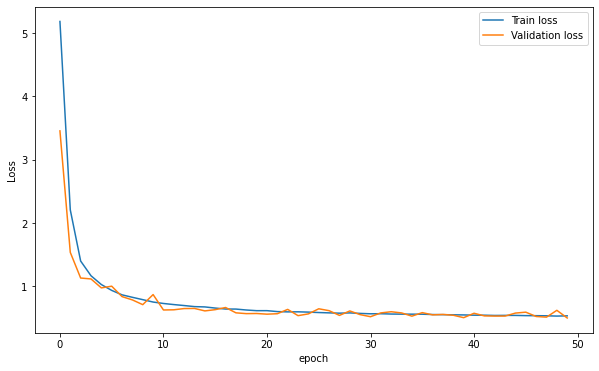

In [ ]:
def plot_loss(history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss(history)

In [ ]:
# SHAP

In [ ]:
# !pip install shap
import shap

In [ ]:
explainer = shap.GradientExplainer(new_model,data[0:10000])


In [ ]:
shap_values = explainer.shap_values(x_test[0:10])

In [ ]:
x_test[0,:]

array([[0.34155181],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.34782609],
       [0.72727273],
       [0.5       ],
       [0.8       ],
       [0.61377246]])

In [ ]:
[x for x in x_test[0,:]]

[array([0.34155181]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.34782609]),
 array([0.72727273]),
 array([0.5]),
 array([0.8]),
 array([0.61377246])]

In [ ]:
# shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], x_test[0,:])